In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
        print(os.path.join(dirname))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/rock-paper-scissors-dataset
/kaggle/input/rock-paper-scissors-dataset/rock-paper-scissors
/kaggle/input/rock-paper-scissors-dataset/rock-paper-scissors/Rock-Paper-Scissors
/kaggle/input/rock-paper-scissors-dataset/rock-paper-scissors/Rock-Paper-Scissors/train
/kaggle/input/rock-paper-scissors-dataset/rock-paper-scissors/Rock-Paper-Scissors/train/paper
/kaggle/input/rock-paper-scissors-dataset/rock-paper-scissors/Rock-Paper-Scissors/train/scissors
/kaggle/input/rock-paper-scissors-dataset/rock-paper-scissors/Rock-Paper-Scissors/train/rock
/kaggle/input/rock-paper-scissors-dataset/rock-paper-scissors/Rock-Paper-Scissors/validation
/kaggle/input/rock-paper-scissors-dataset/rock-paper-scissors/Rock-Paper-Scissors/test
/kaggle/input/rock-paper-scissors-dataset/rock-paper-scissors/Rock-Paper-Scissors/test/paper
/kaggle/input/rock-paper-scissors-dataset/rock-paper-scissors/Rock-Paper-Scissors/test/scissors
/kaggle/input/rock-paper-scissors-dataset/rock-paper-scisso

In [70]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as  np
import matplotlib.pyplot as plt
import matplotlib.pyplot as image


In [11]:
#defining our training and validation data set path
train_data = "/kaggle/input/rock-paper-scissors-dataset/rock-paper-scissors/Rock-Paper-Scissors/train"
validation_data = "/kaggle/input/rock-paper-scissors-dataset/rock-paper-scissors/Rock-Paper-Scissors/test"

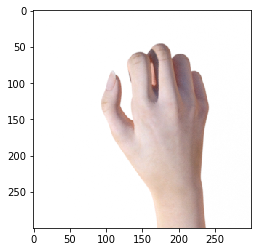

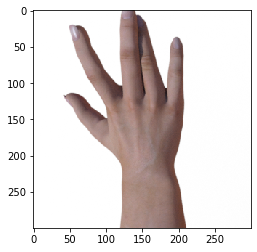

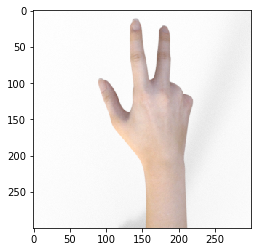

In [71]:
#printing images

def read_img(path):
    img=mpimg.imread(path)
    imgplot = plt.imshow(img)
    return plt.show()

read_img("/kaggle/input/rock-paper-scissors-dataset/rock-paper-scissors/Rock-Paper-Scissors/train/rock/rock01-001.png")

read_img("/kaggle/input/rock-paper-scissors-dataset/rock-paper-scissors/Rock-Paper-Scissors/train/paper/paper01-005.png")

read_img("/kaggle/input/rock-paper-scissors-dataset/rock-paper-scissors/Rock-Paper-Scissors/train/scissors/scissors01-005.png")
    

In [13]:
#definig a callback to stop our model when it gets 95%
class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.95):
            print("\nReached 92 accuracy so cancelling training!")
            self.model.stop_training = True
    

In [14]:
#importing dataset 
train_genr = ImageDataGenerator(rescale = 1./255.)
validation_genr = ImageDataGenerator(rescale = 1./255.)

train_imgs = train_genr.flow_from_directory(directory = train_data, batch_size = 32,
                                                  target_size = (300,300), class_mode = 'categorical' )

val_imgs = validation_genr.flow_from_directory(directory = validation_data, batch_size = 32,
                                                  target_size = (300,300), class_mode = 'categorical' )
#initiallising call backs
callbacks = myCallbacks()

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [15]:
model = tf.keras.models.Sequential([
    #adding convolution layer and maxpooling layers
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3*3), activation = 'relu', input_shape = (300,300,3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2*2)),
    tf.keras.layers.Conv2D(64, kernel_size = (3*3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2*2)),
    tf.keras.layers.Conv2D(128, kernel_size = (3*3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2*2)),
    
    #flatting  array because dense layer takes input in 1d
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')

])



#compiling the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

#summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 292, 292, 32)      7808      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 73, 73, 64)        165952    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 128)       663680    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [16]:
#fitting the model
history = model.fit(train_imgs, validation_data = val_imgs, epochs = 20, steps_per_epoch = 30, verbose = 1, callbacks = [callbacks])

Train for 30 steps, validate for 12 steps
Epoch 1/20
30/30 [==============================] - 200s 7s/step - loss: 1.0700 - acc: 0.4727 - val_loss: 1.0697 - val_acc: 0.4489
Epoch 2/20
30/30 [==============================] - 186s 6s/step - loss: 0.9566 - acc: 0.5966 - val_loss: 1.0084 - val_acc: 0.4059
Epoch 3/20
30/30 [==============================] - 186s 6s/step - loss: 0.7435 - acc: 0.7101 - val_loss: 0.7891 - val_acc: 0.7419
Epoch 4/20
30/30 [==============================] - 188s 6s/step - loss: 0.4357 - acc: 0.8427 - val_loss: 0.6460 - val_acc: 0.8065
Epoch 5/20
29/30 [============================>.] - ETA: 5s - loss: 0.1536 - acc: 0.9677 
Reached 92 accuracy so cancelling training!
30/30 [==============================] - 189s 6s/step - loss: 0.1504 - acc: 0.9688 - val_loss: 0.3110 - val_acc: 0.9167


<Figure size 432x288 with 0 Axes>

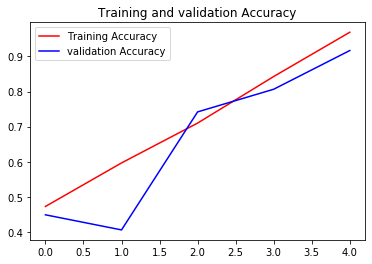

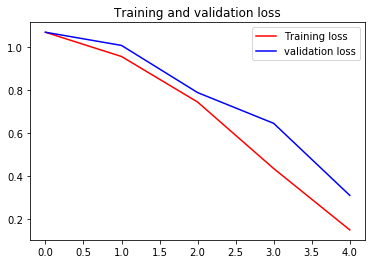

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
acc= history.history['acc']
loss = history.history['loss']

val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r' ,label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'validation Accuracy')
plt.title("Training and validation Accuracy")
plt.legend()
plt.figure()



plt.plot(epochs, loss, 'r',  label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title("Training and validation loss")
plt.legend()
plt.figure()

In [52]:
model.save('h.h5') #save our model for further use

In [56]:
from tensorflow.keras.models import load_model
model  = load_model('h.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 292, 292, 32)      7808      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 73, 73, 64)        165952    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 128)       663680    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

### Reading image and predicting it

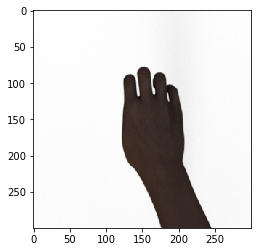

In [116]:
import numpy as np
from keras.preprocessing import image
path = '/kaggle/input/rock-paper-scissors-dataset/rock-paper-scissors/Rock-Paper-Scissors/validation/paper5.png'
read_img(path)
#reading images
img = image.load_img(path, target_size = (300,300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.expand_dims(x, axis = 0)
images = np.vstack([x])


In [117]:
def predict_img(img):
    pred_clss = model.predict_classes(images)
    print("prediction class is :", pred_clss)
    if pred_clss ==array([1]):
        print('rock')
    elif pred_clss ==array([0]):
        print('paper')
    if pred_clss ==array([1]):
        print('scissor')
    
          

In [118]:
predict_img(path)

prediction class is : [1]
rock
scissor
